In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import pylab as py
%matplotlib inline

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
#df=sb.load_dataset('titanic')
df=pd.read_csv('./titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.groupby('Survived').count().iloc[:,1]

Survived
0    549
1    342
Name: Pclass, dtype: int64

In [7]:
df.groupby(['Pclass','Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   64     80     80      80    80   
       1                 136   136  136  122    136    136     136   136   
2      0                  97    97   97   90     97     97      97    97   
       1                  87    87   87   83     87     87      87    87   
3      0                 372   372  372  270    372    372     372   372   
       1                 119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            59        80  
       1           117       134  
2      0             3        97  
       1            13        87  
3      0             6       372  
       1             6       119

In [8]:
df.groupby(['Sex','Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [9]:
df.agg('count')

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [10]:
df.agg(['count','max'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,714.0,891,891,891,891.0000,204.0,889.0
max,891,1,3,"van Melkebeke, Mr. Philemon",male,80.0,8,6,WE/P 5735,512.3292,NaN,NaN


In [11]:

df.agg({'Name':'count', 'Fare':'sum' , 'Age':'max'})

Name      891.0000
Fare    28693.9493
Age        80.0000
dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

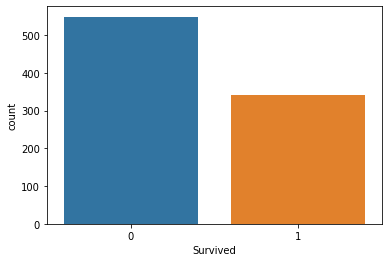

In [12]:
sb.countplot(x='Survived' ,data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

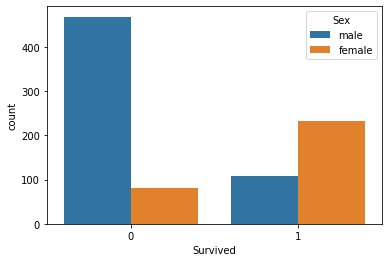

In [13]:
sb.countplot(x='Survived',hue='Sex' ,data=df)

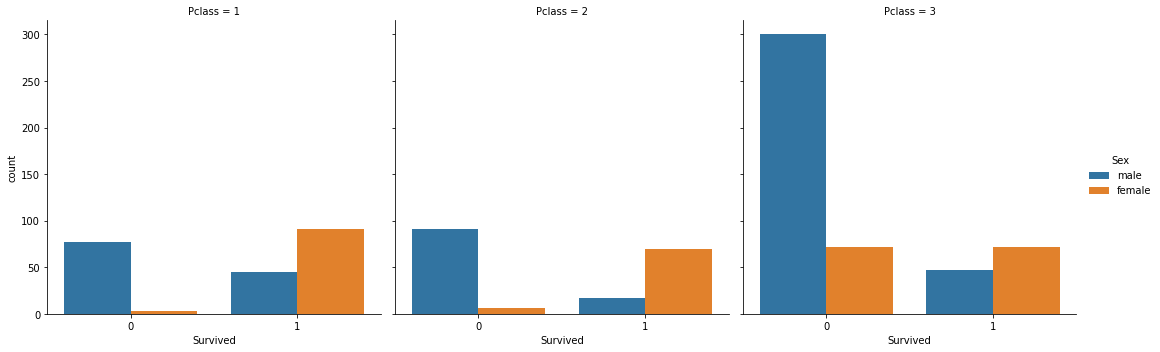

In [14]:
sb.catplot(x='Survived',hue='Sex',data=df,col='Pclass',kind='count')

<AxesSubplot:>

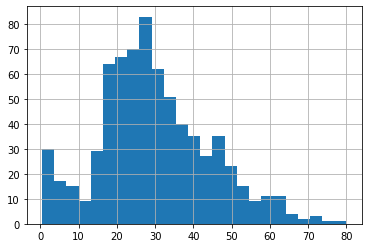

In [15]:
#sb.distplot(df['Age'])
#sb.distplot(df['Age'].dropna(),bins=25,kde=False)
df['Age'].hist(bins=25)
#df['Fare'].hist(bins=40,figsize=(15,6))

<AxesSubplot:xlabel='Age'>

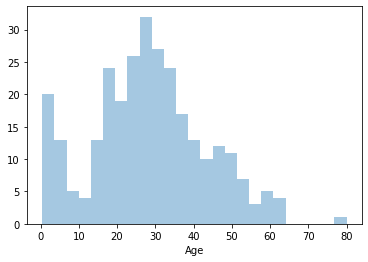

In [16]:
sb.distplot(df[df['Survived']==1]['Age'].dropna(),bins=25,kde=False)

In [17]:
#!pip install cufflinks
import cufflinks as cf

In [18]:
cf.go_offline()

In [19]:
df['Age'].iplot(kind='hist',bins=30,color='green')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df.isna().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [23]:
len(df)

891

In [24]:
df.shape

(891, 12)

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
df2 = df[ ['Pclass','Sex','SibSp','Parch','Fare'] ]

In [27]:
df2.isna().sum().sum()

0

In [28]:
df2.head()

,Pclass,Sex,SibSp,Parch,Fare
0,3,male,1,0,7.2500
1,1,female,1,0,71.2833
2,3,female,0,0,7.9250
3,1,female,1,0,53.1000
4,3,male,0,0,8.0500


In [29]:
df2 = pd.get_dummies(df2, columns=['Sex'], drop_first=True)
df2.head(3)

,Pclass,SibSp,Parch,Fare,Sex_male
0,3,1,0,7.2500,1
1,1,1,0,71.2833,0
2,3,0,0,7.9250,0


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, df.Survived, test_size=0.33, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
pred=model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       175
           1       0.78      0.69      0.73       120

    accuracy                           0.80       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.80      0.80      0.79       295



In [37]:
model.coef_

array([[-0.55783855, -0.23175508, -0.11147728,  0.00576889, -2.41114221]])

In [38]:
df2.columns

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_male'], dtype='object')

In [39]:
###################################################

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

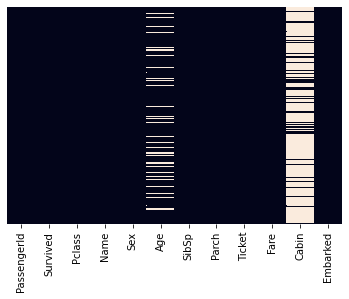

In [41]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

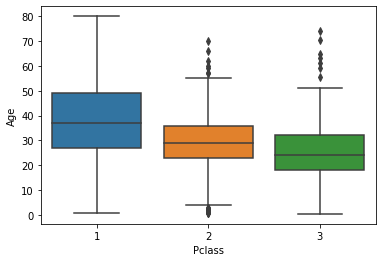

In [42]:
sb.boxplot(y='Age',x='Pclass', data=df)

In [43]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [44]:
df[(df['Pclass']==2) & (df['Age']> 57)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5,NaN,S
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5,NaN,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5,NaN,S
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0,NaN,S


In [45]:
for k,v in df.iterrows():
    ls=[0,37,29,24]
    if np.isnan(v.Age):
            df.loc[k,'Age'] = ls[v.Pclass]
        

<AxesSubplot:>

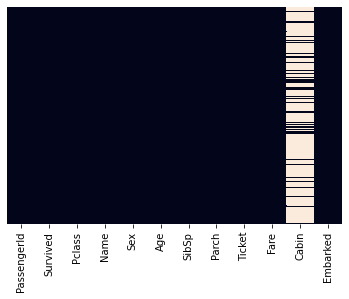

In [46]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [47]:
df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

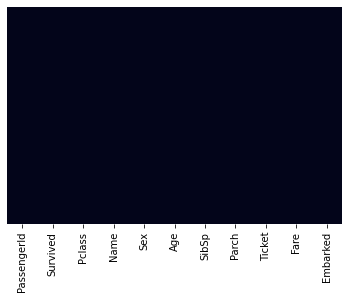

In [48]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [49]:
df.dropna(inplace=True)

<AxesSubplot:>

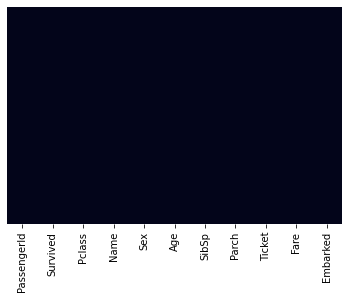

In [50]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False)

Creating a dummy variables (indicators)

In [51]:
df['Sex']=(pd.get_dummies(df['Sex'],drop_first=True)).astype(np.int64)

or simple way:

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [53]:
df3 = pd.get_dummies(df['Pclass'],drop_first=True)

In [54]:
df['Sex'].replace('male',0,inplace=True)
df['Sex'].replace('female',1,inplace=True)

In [55]:
emb=pd.get_dummies(df['Embarked'],drop_first=True)

In [56]:
emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [57]:
df = pd.concat([df,emb],axis=1)

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,1


In [59]:
df.drop(['PassengerId','Embarked','Ticket','Name'],axis=1,inplace=True)

In [60]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


__the model__

In [61]:
import sklearn.model_selection as mods
X_train, X_test, y_train, y_test = mods.train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

In [62]:
import sklearn.linear_model as sklin

In [63]:
model=sklin.LogisticRegression()

In [64]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
predictions=model.predict(X_test)

In [66]:
predictions[20:30]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [67]:
y_test[20:30]

158    0
490    0
185    0
110    0
480    0
724    1
139    0
657    0
7      0
238    0
Name: Survived, dtype: int64

In [68]:
s1=(predictions != y_test)

In [69]:
np.mean(predictions != y_test)

0.19101123595505617

convert category to dummy variables


In [70]:
pd.get_dummies(df['Pclass'],drop_first=True)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [71]:
df = pd.concat([df,pd.get_dummies(df['Pclass'],drop_first=True)],axis=1)

In [72]:
df.drop('Pclass',axis=1,inplace=True)

In [73]:
y_test.count()

267

In [74]:
import sklearn.metrics as skmet

In [75]:
cmat = skmet.confusion_matrix(y_test,predictions)

# TN       FP
# FN       TP

In [76]:
cmat

array([[148,  15],
       [ 36,  68]], dtype=int64)

precision - Actual yes / Total perdicted yes - TP / (FP + TP)

In [77]:
pre = cmat[1,1]/(cmat[0,1]+cmat[1,1])
pre

0.8192771084337349

recall - TP / (FN + TP)

In [78]:
recall = cmat[1,1]/(cmat[1,0]+ cmat[1,1])
recall

0.6538461538461539

In [79]:
f1_score = 2*((pre*recall)/(pre + recall))
f1_score

0.7272727272727274

In [80]:
c1=skmet.classification_report(y_test,predictions)

In [81]:
print(c1)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [82]:
model.coef_

array([[-0.78495497, -2.32107195, -0.02586378, -0.21650014, -0.08529255,
         0.0046857 , -0.01528111, -0.16977439]])